In [3]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the start and end dates
start_date = datetime(2010, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = ['TSLA', 'CRM', 'GS', 'MSFT', 'DAL', 'AAPL', 'V', 'F', 'DELL', 'GOOGL']

# Define the index (S&P 500)
index_ticker = '^GSPC'

# Download index data
index_data = yf.download(index_ticker, start=start_date, end=end_date)['Close'].pct_change().dropna()

# Initialize a dictionary to store betas
betas = {}

# Loop through each company, download the data, calculate beta and store it
for ticker in companies:
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)['Close'].pct_change().dropna()

    # Align the index and the stock data by date
    aligned_data = pd.concat([stock_data, index_data], axis=1, join='inner')
    aligned_data.columns = ['stock_return', 'index_return']

    # Calculate covariance and variance
    covariance = aligned_data['stock_return'].cov(aligned_data['index_return'])
    variance = aligned_data['index_return'].var()

    # Calculate beta and store it
    beta = covariance / variance
    betas[ticker] = beta

# Convert the betas dictionary to a DataFrame for better visualization
betas_df = pd.DataFrame(list(betas.items()), columns=['Ticker', 'Beta'])

# Sort the DataFrame by beta values in descending order
sorted_betas_df = betas_df.sort_values(by='Beta', ascending=False)

# Print the sorted DataFrame
print(sorted_betas_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Ticker      Beta
0   TSLA  1.403172
1    CRM  1.282175
4    DAL  1.259647
7      F  1.221153
2     GS  1.198375
3   MSFT  1.122262
5   AAPL  1.110406
8   DELL  1.108466
9  GOOGL  1.088856
6      V  1.043351


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


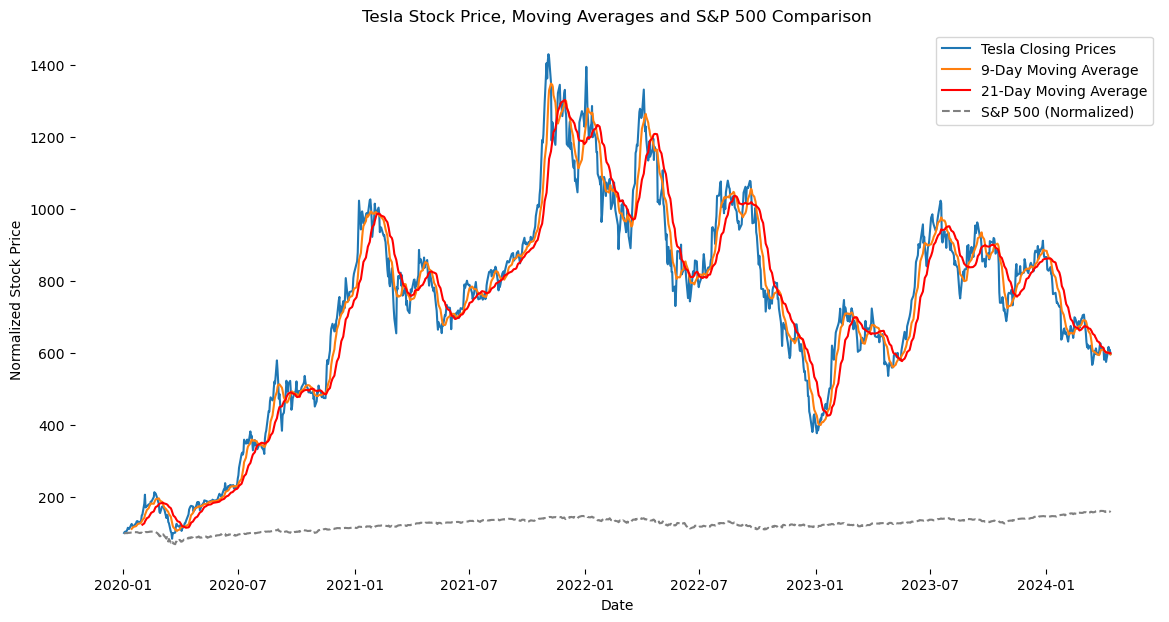

[*********************100%%**********************]  1 of 1 completed


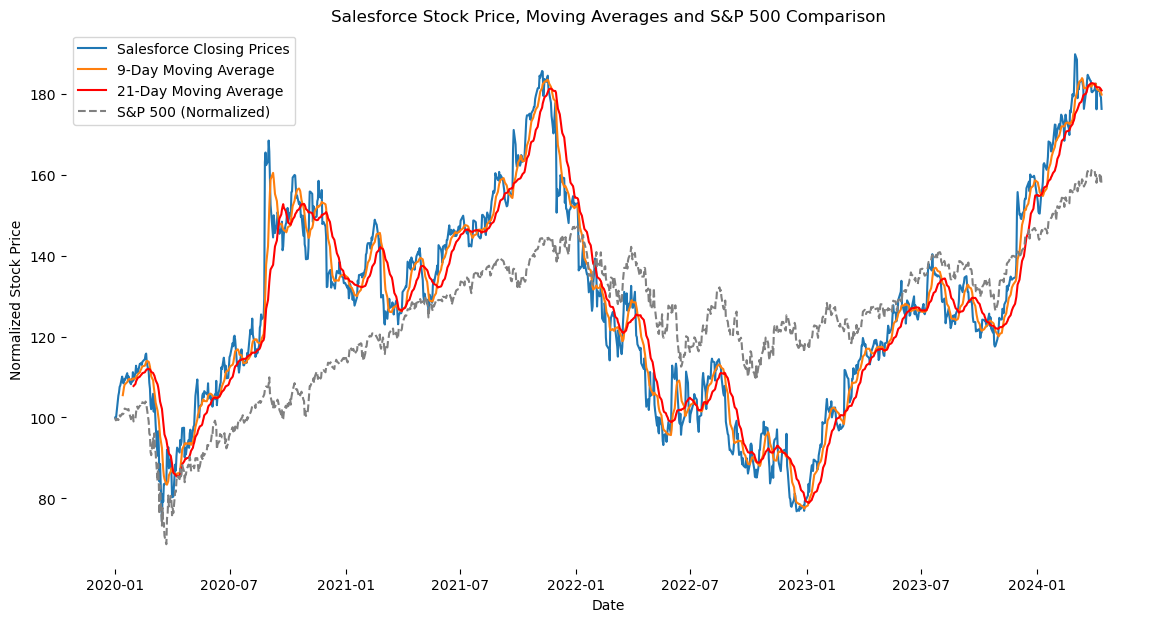

[*********************100%%**********************]  1 of 1 completed


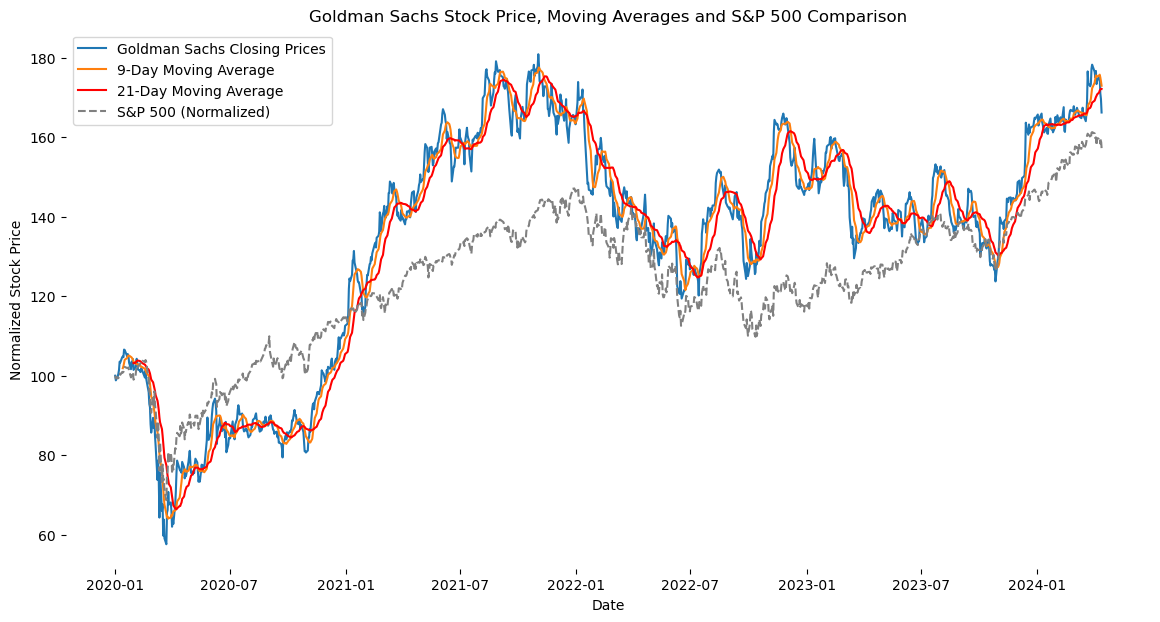

[*********************100%%**********************]  1 of 1 completed


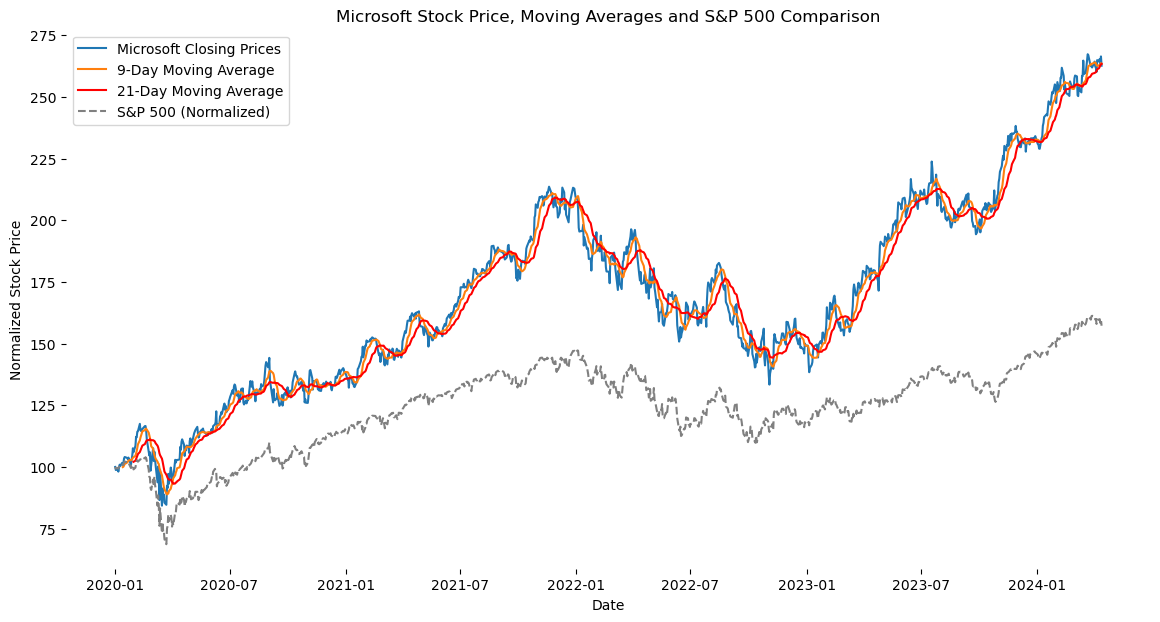

[*********************100%%**********************]  1 of 1 completed


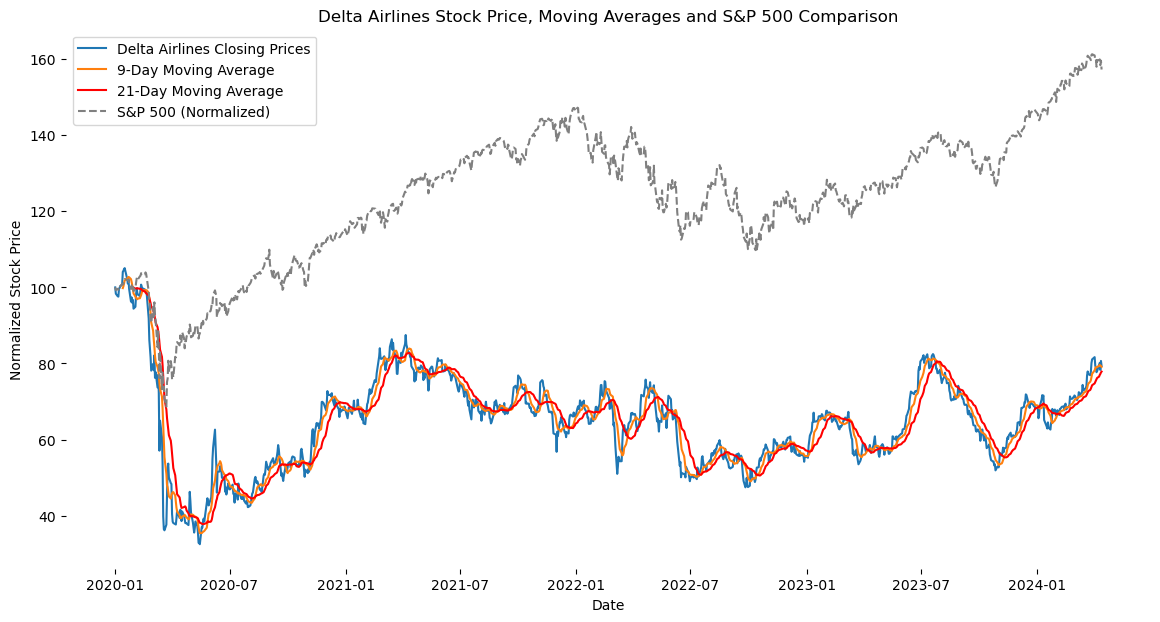

[*********************100%%**********************]  1 of 1 completed


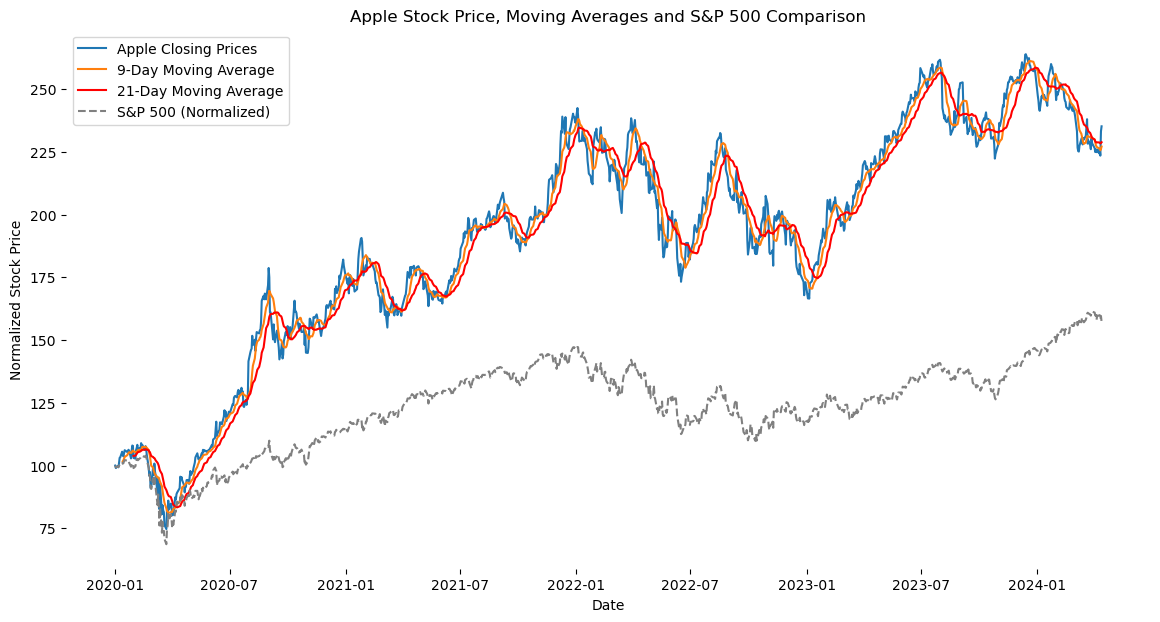

[*********************100%%**********************]  1 of 1 completed


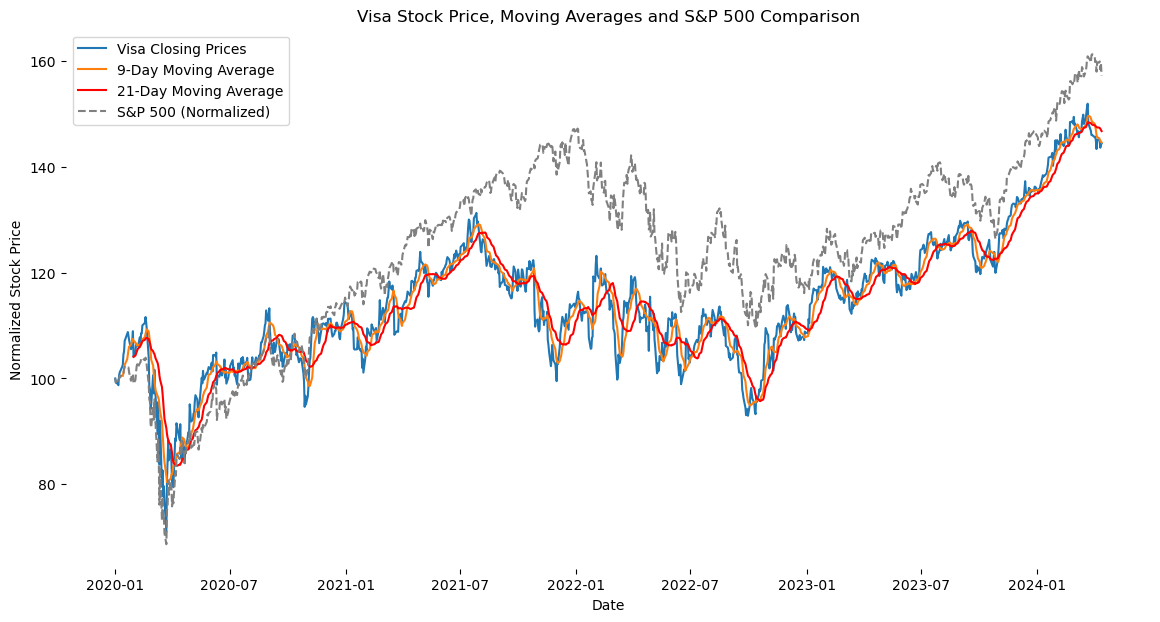

[*********************100%%**********************]  1 of 1 completed


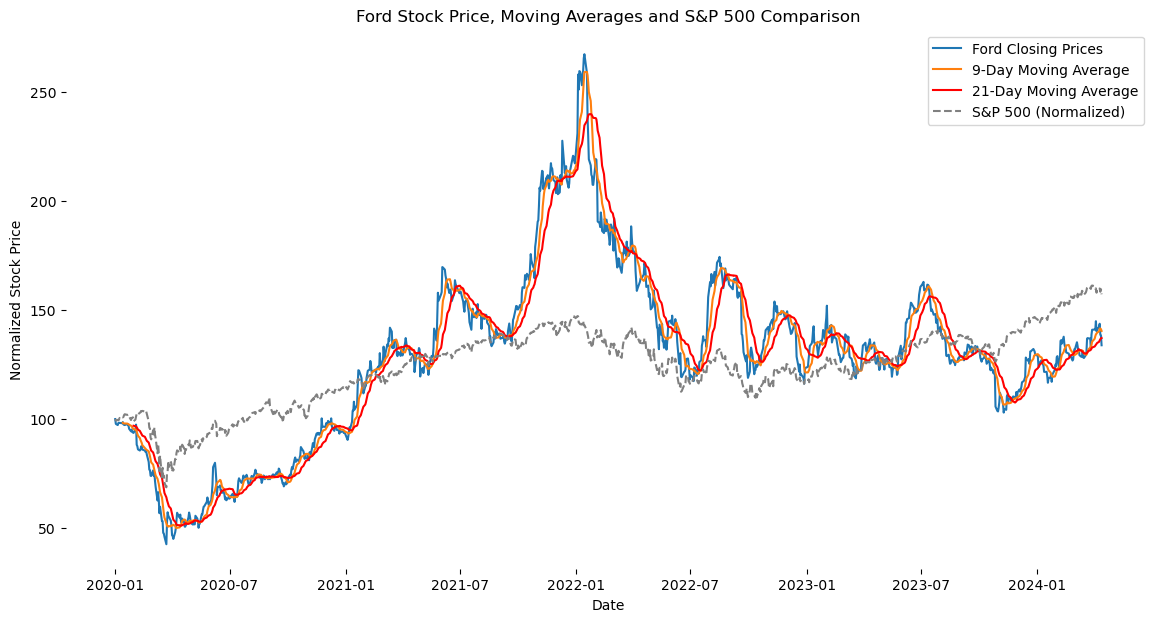

[*********************100%%**********************]  1 of 1 completed


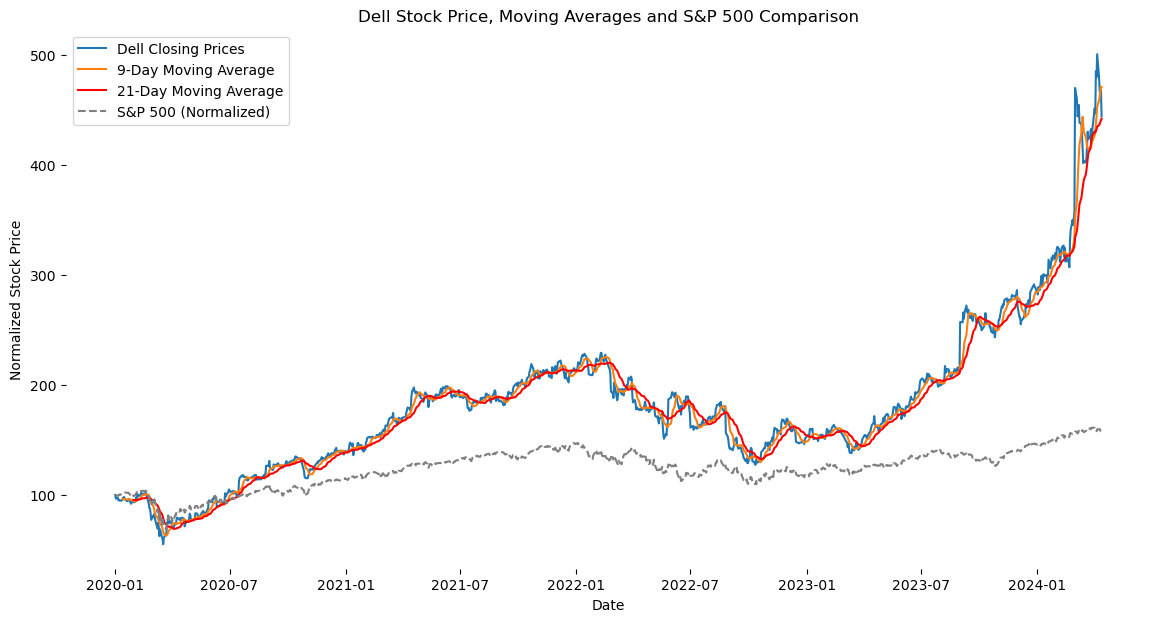

[*********************100%%**********************]  1 of 1 completed


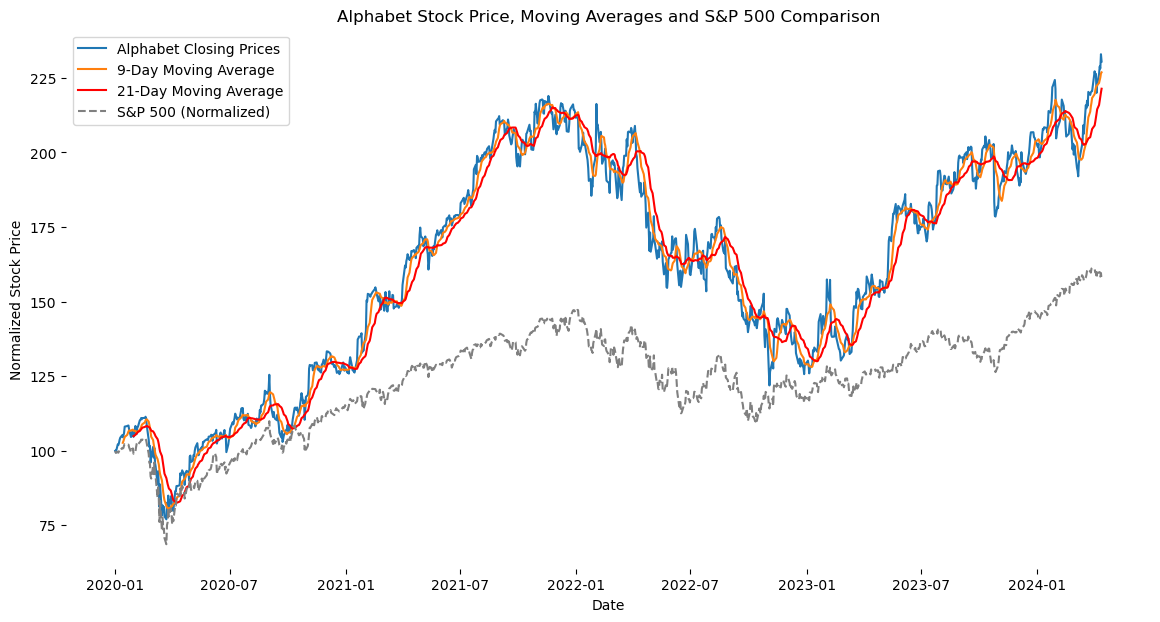

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = {
    'TSLA': 'Tesla',
    'CRM': 'Salesforce',
    'GS': 'Goldman Sachs',
    'MSFT': 'Microsoft',
    'DAL': 'Delta Airlines',
    'AAPL': 'Apple',
    'V': 'Visa',
    'F': 'Ford',
    'DELL': 'Dell',
    'GOOGL': 'Alphabet'
}

# Download S&P 500 index data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']

# Normalize S&P 500 data for comparison
sp500_normalized = (sp500_data / sp500_data.iloc[0]) * 100

# Loop through each company, download the data, calculate moving averages, and plot
for ticker, name in companies.items():
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Normalize stock data for comparison
    stock_data['Normalized'] = (stock_data['Close'] / stock_data['Close'].iloc[0]) * 100
    
    # Calculate moving averages on the normalized prices
    stock_data['MA9'] = stock_data['Normalized'].rolling(window=9).mean()
    stock_data['MA21'] = stock_data['Normalized'].rolling(window=21).mean()
    
    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Normalized'], label=f'{name} Closing Prices')
    plt.plot(stock_data['MA9'], label='9-Day Moving Average')
    plt.plot(stock_data['MA21'], label='21-Day Moving Average', color='red')
    plt.plot(sp500_normalized, label='S&P 500 (Normalized)', linestyle='--', color='gray')
    
    plt.title(f'{name} Stock Price, Moving Averages and S&P 500 Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Stock Price')
    plt.legend()
    
    # Remove grid and spines
    plt.grid(False)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    plt.savefig(f'{name}_stock_comparison.png', format='png', dpi=300)
    
    plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


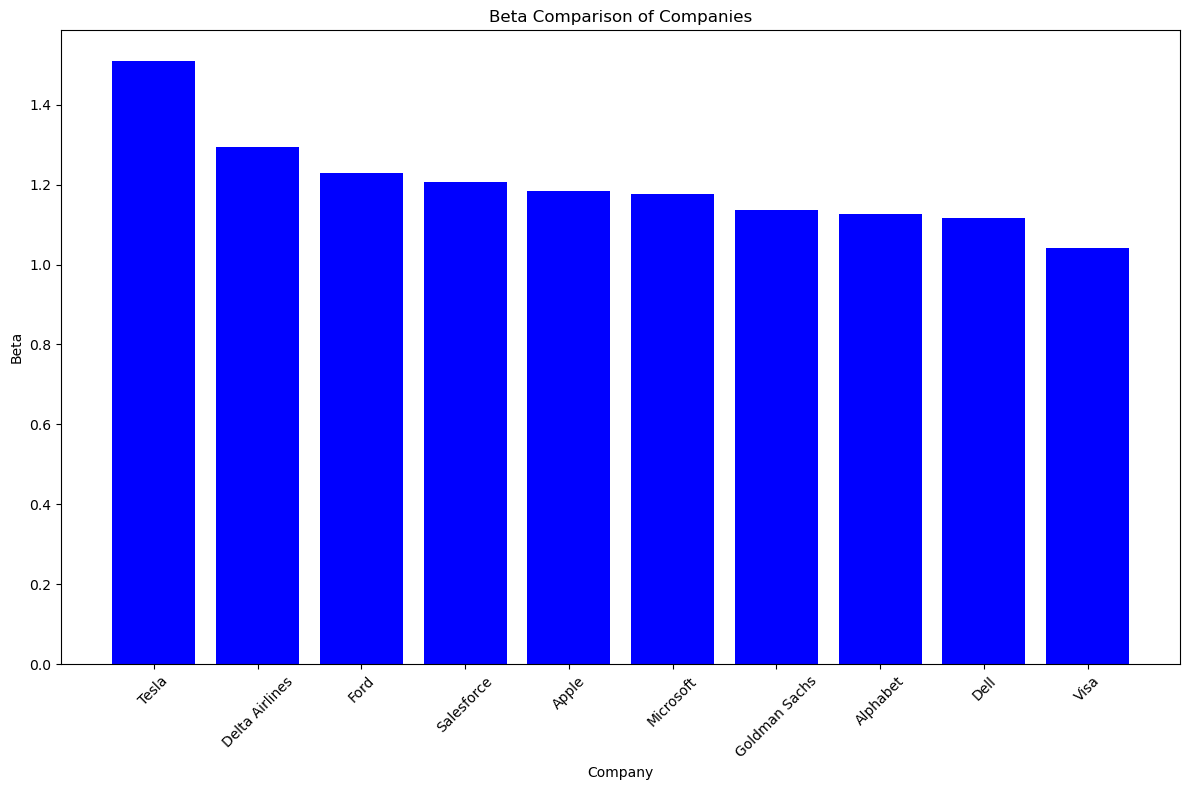

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = {
    'TSLA': 'Tesla',
    'CRM': 'Salesforce',
    'GS': 'Goldman Sachs',
    'MSFT': 'Microsoft',
    'DAL': 'Delta Airlines',
    'AAPL': 'Apple',
    'V': 'Visa',
    'F': 'Ford',
    'DELL': 'Dell',
    'GOOGL': 'Alphabet'
}

# Download S&P 500 index data
index_data = yf.download('^GSPC', start=start_date, end=end_date)['Close'].pct_change().dropna()

# Initialize a dictionary to store betas
betas = {}

# Loop through each company, download the data, calculate beta and store it
for ticker, name in companies.items():
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)['Close'].pct_change().dropna()

    # Align the index and the stock data by date
    aligned_data = pd.concat([stock_data, index_data], axis=1, join='inner')
    aligned_data.columns = ['stock_return', 'index_return']

    # Calculate covariance and variance
    covariance = aligned_data['stock_return'].cov(aligned_data['index_return'])
    variance = aligned_data['index_return'].var()

    # Calculate beta and store it
    beta = covariance / variance
    betas[name] = beta

# Convert the betas dictionary to a DataFrame for better visualization
betas_df = pd.DataFrame(list(betas.items()), columns=['Company', 'Beta'])

# Sort the DataFrame by beta values in descending order
betas_df.sort_values('Beta', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(betas_df['Company'], betas_df['Beta'], color='blue')
plt.xlabel('Company')
plt.ylabel('Beta')
plt.title('Beta Comparison of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('beta_comparison.png')  # Save the figure as PNG file
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


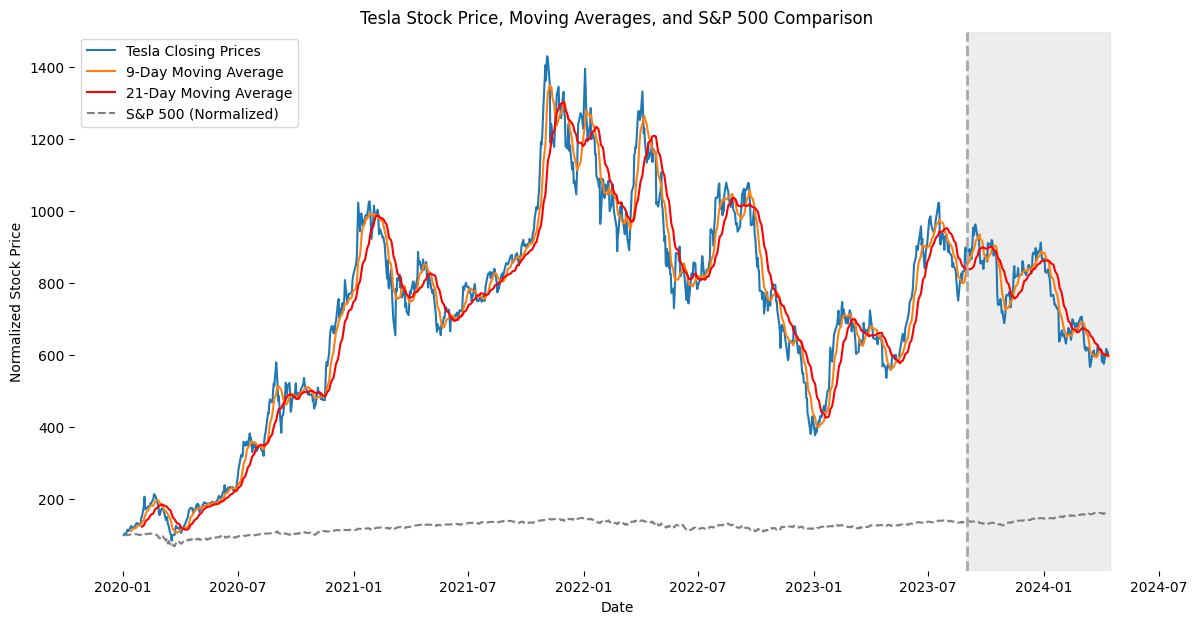

[*********************100%%**********************]  1 of 1 completed


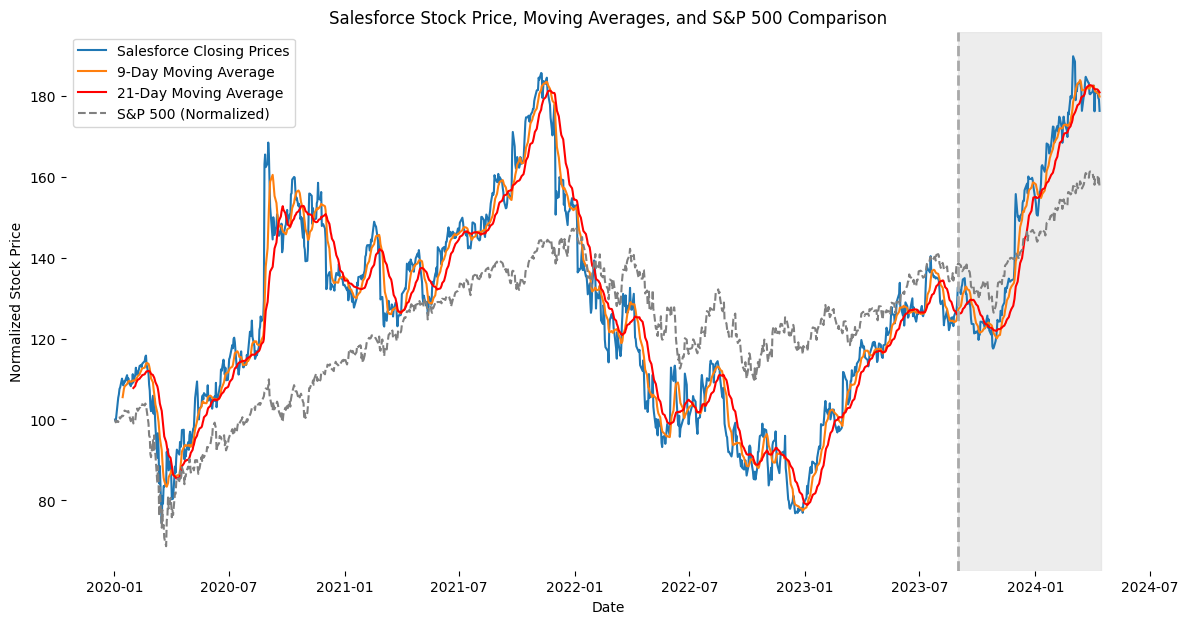

[*********************100%%**********************]  1 of 1 completed


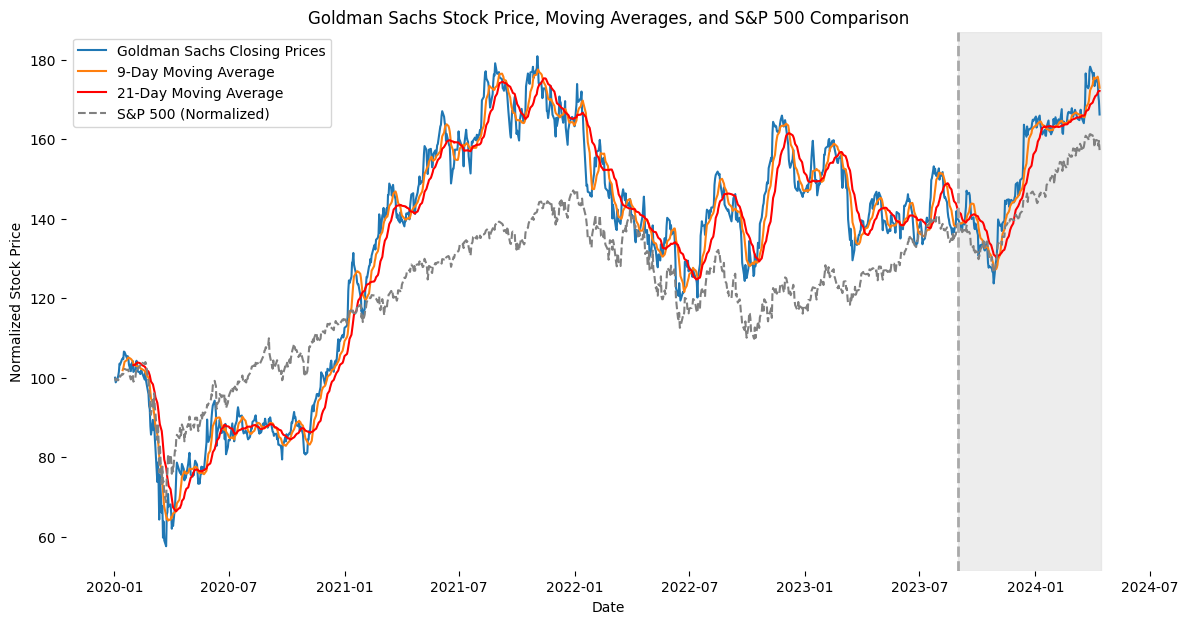

[*********************100%%**********************]  1 of 1 completed


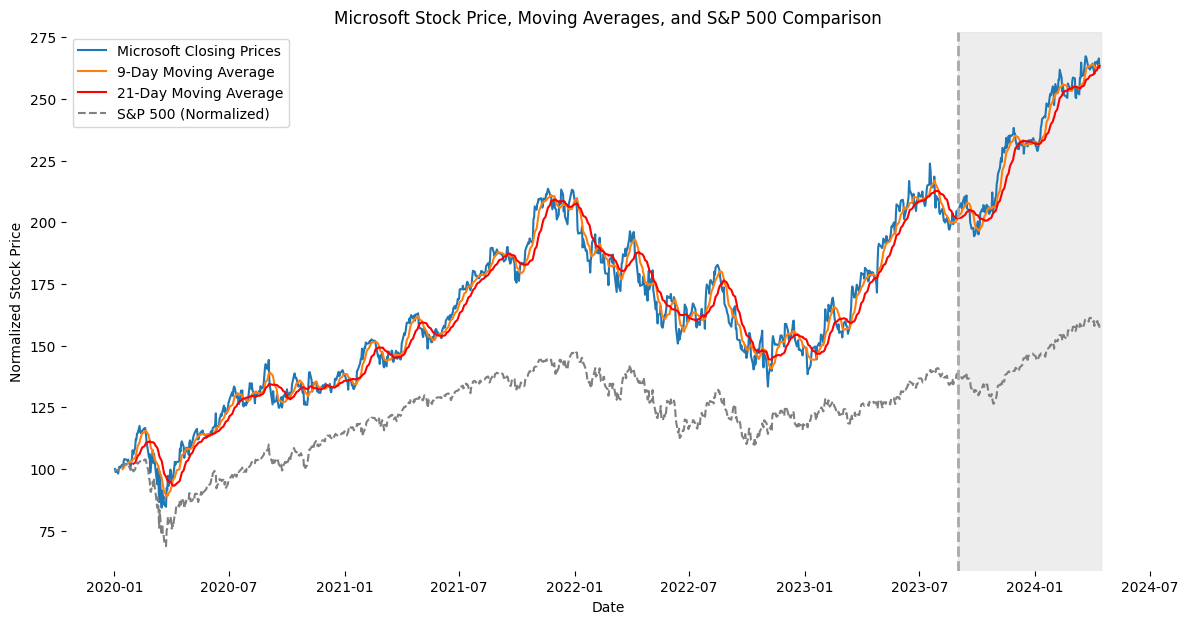

[*********************100%%**********************]  1 of 1 completed


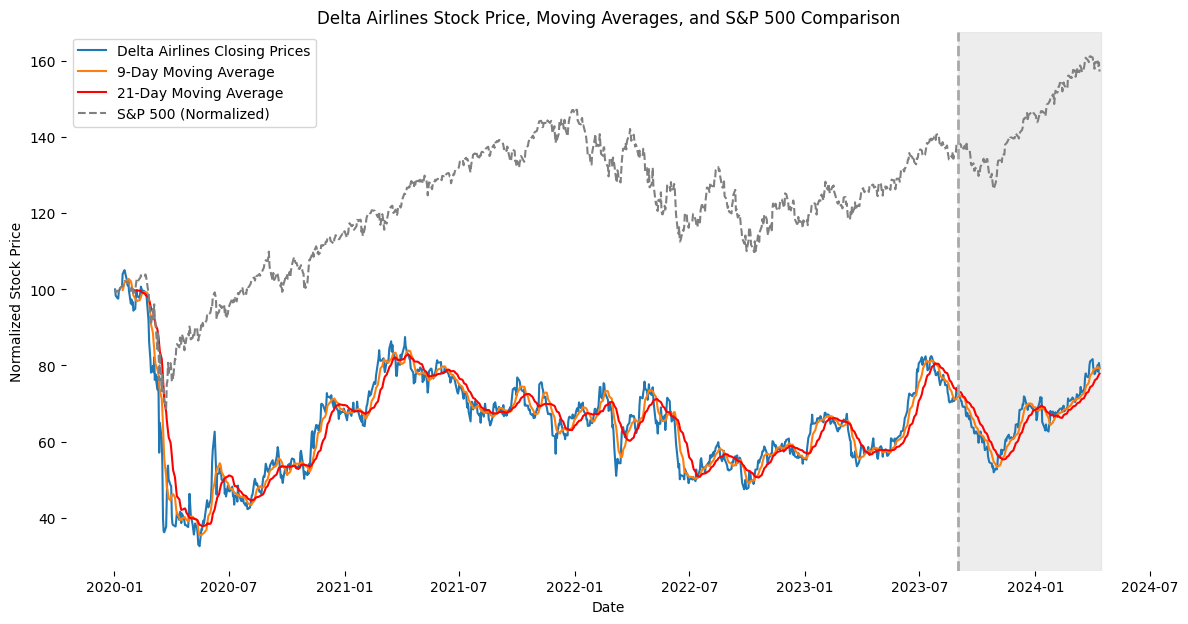

[*********************100%%**********************]  1 of 1 completed


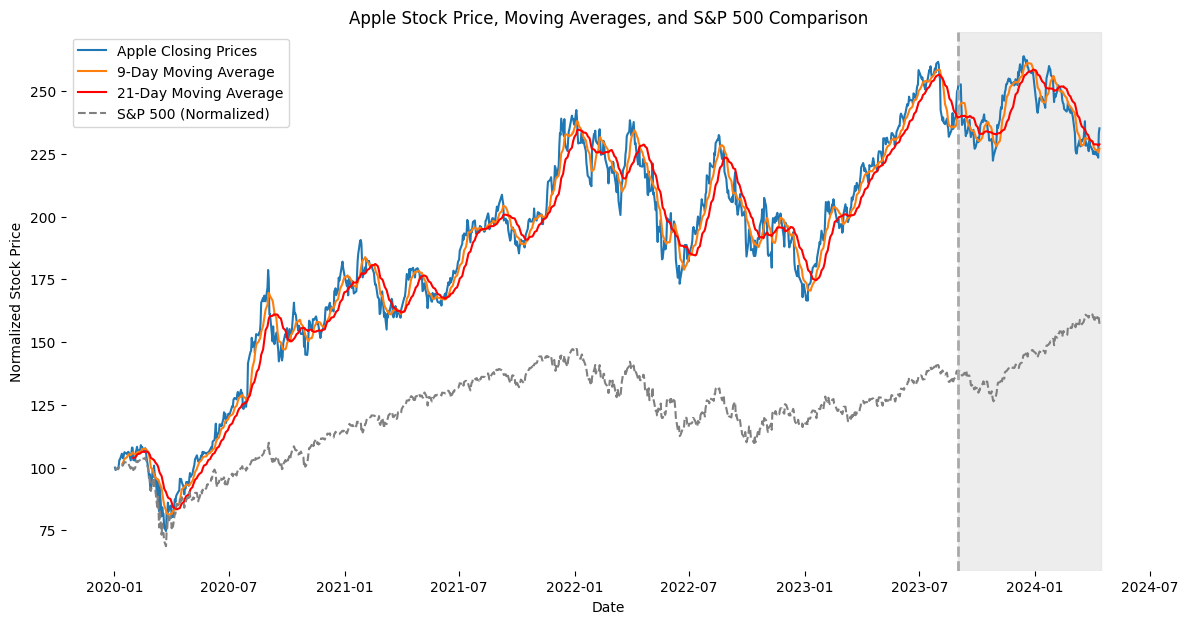

[*********************100%%**********************]  1 of 1 completed


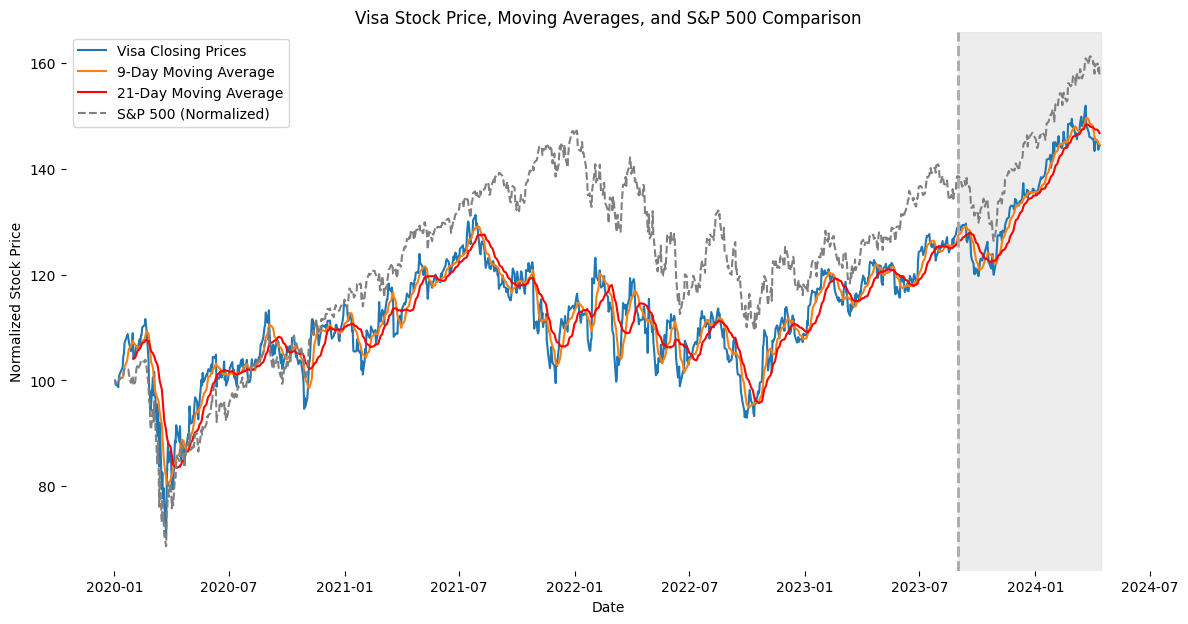

[*********************100%%**********************]  1 of 1 completed


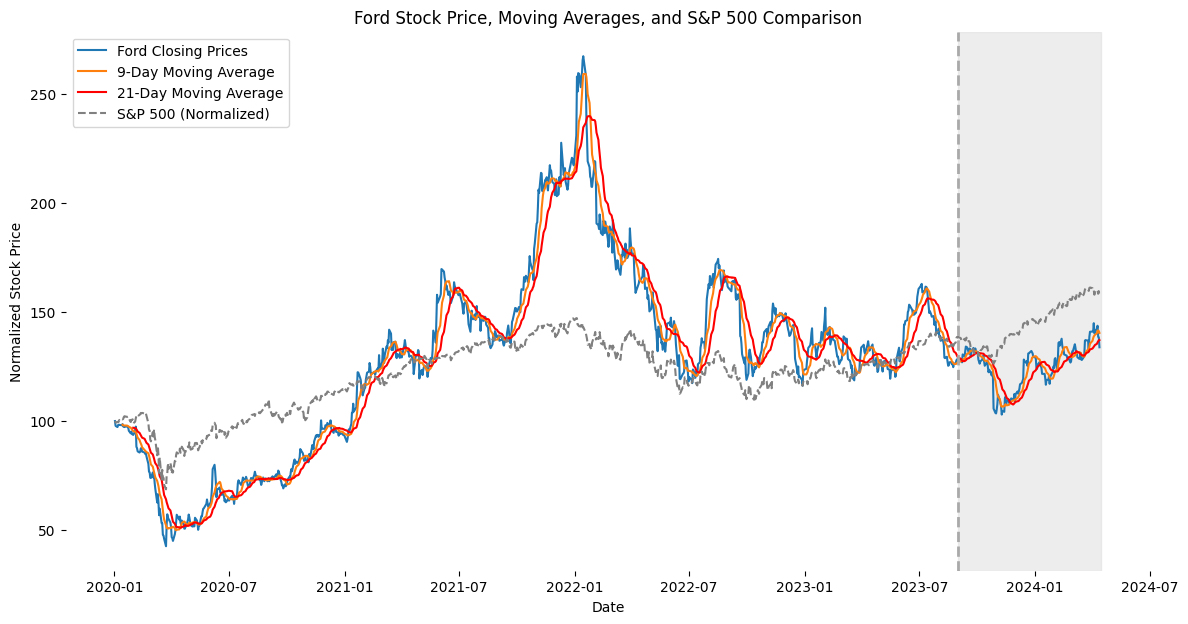

[*********************100%%**********************]  1 of 1 completed


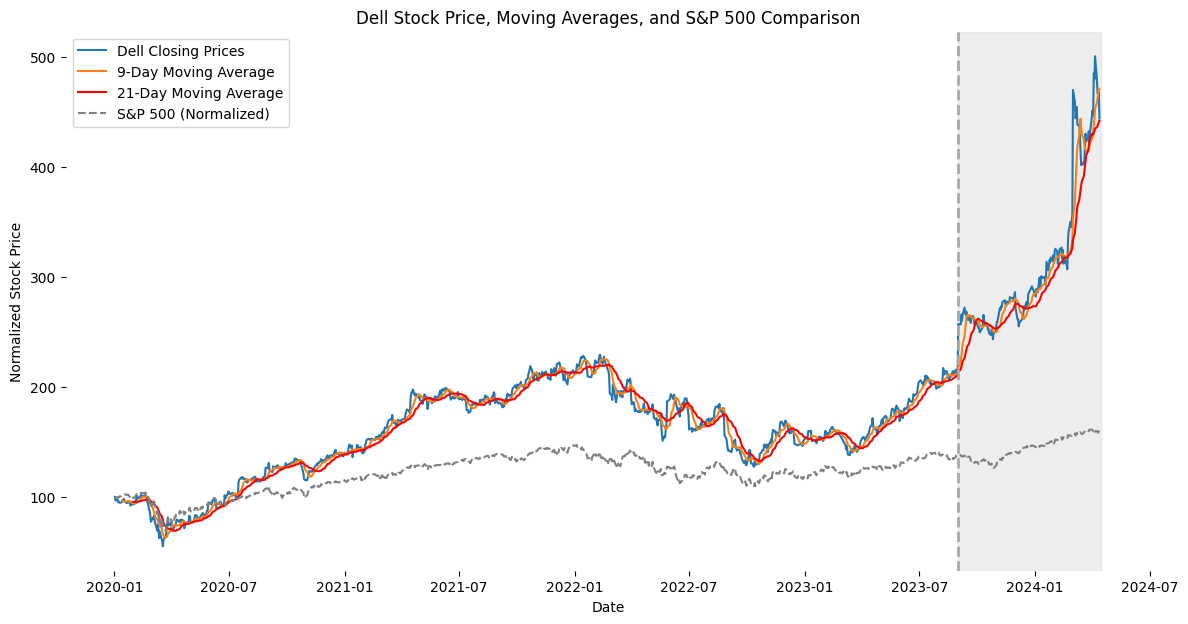

[*********************100%%**********************]  1 of 1 completed


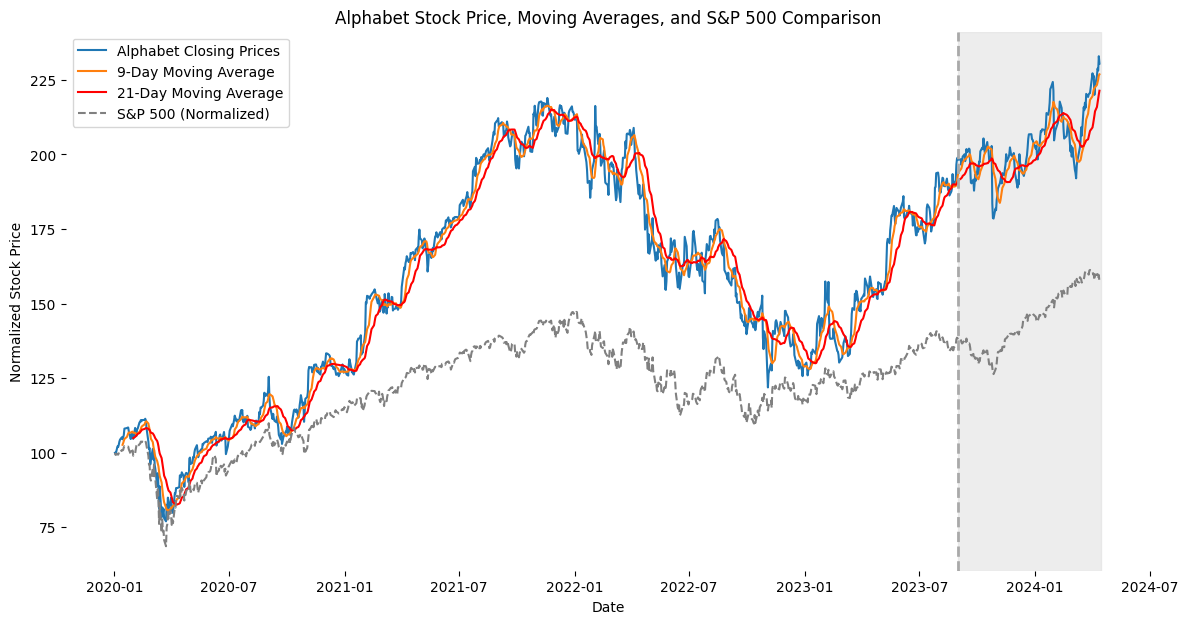

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = {
    'TSLA': 'Tesla',
    'CRM': 'Salesforce',
    'GS': 'Goldman Sachs',
    'MSFT': 'Microsoft',
    'DAL': 'Delta Airlines',
    'AAPL': 'Apple',
    'V': 'Visa',
    'F': 'Ford',
    'DELL': 'Dell',
    'GOOGL': 'Alphabet'
}

# Download S&P 500 index data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']

# Normalize S&P 500 data for comparison
sp500_normalized = (sp500_data / sp500_data.iloc[0]) * 100

# Define the significant date
significant_date = datetime(2023, 9, 1)

# Loop through each company, download the data, calculate moving averages, and plot
for ticker, name in companies.items():
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Normalize stock data for comparison
    stock_data['Normalized'] = (stock_data['Close'] / stock_data['Close'].iloc[0]) * 100
    
    # Calculate moving averages on the normalized prices
    stock_data['MA9'] = stock_data['Normalized'].rolling(window=9).mean()
    stock_data['MA21'] = stock_data['Normalized'].rolling(window=21).mean()
    
    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Normalized'], label=f'{name} Closing Prices')
    plt.plot(stock_data['MA9'], label='9-Day Moving Average')
    plt.plot(stock_data['MA21'], label='21-Day Moving Average', color='red')
    plt.plot(sp500_normalized, label='S&P 500 (Normalized)', linestyle='--', color='gray')

    # Add vertical line and shade the region
    plt.axvline(x=significant_date, color='darkgrey', linestyle='--', lw=2)
    plt.axvspan(significant_date, end_date, color='gainsboro', alpha=0.5)

    plt.title(f'{name} Stock Price, Moving Averages, and S&P 500 Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Stock Price')
    plt.legend()
    
    # Remove grid and spines
    plt.grid(False)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Save the plot to a file
    plt.savefig(f'{name}_stock_comparison_shaded.png', format='png', dpi=300)
    
    plt.show()